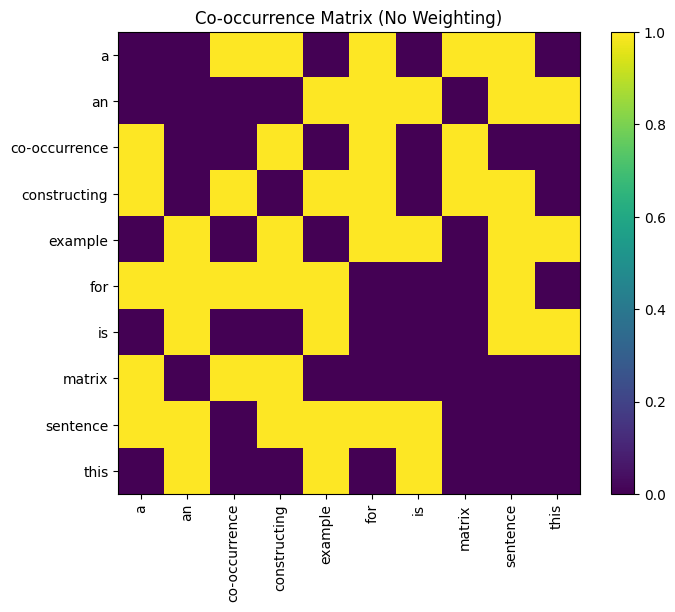

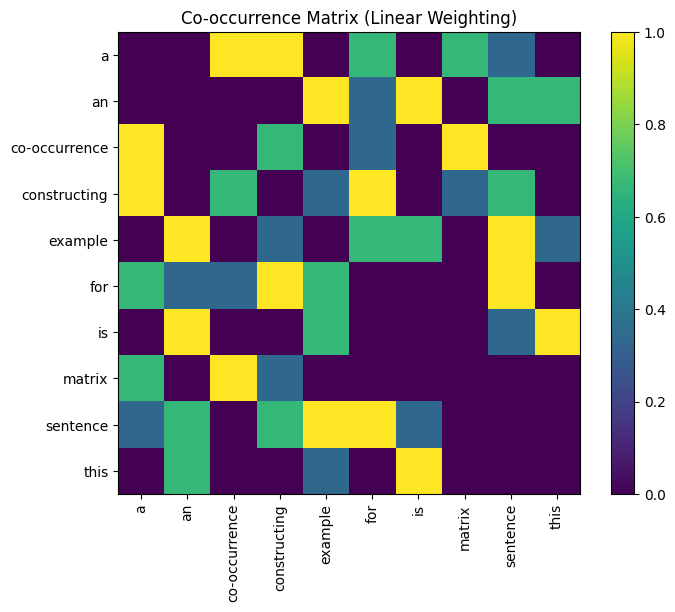

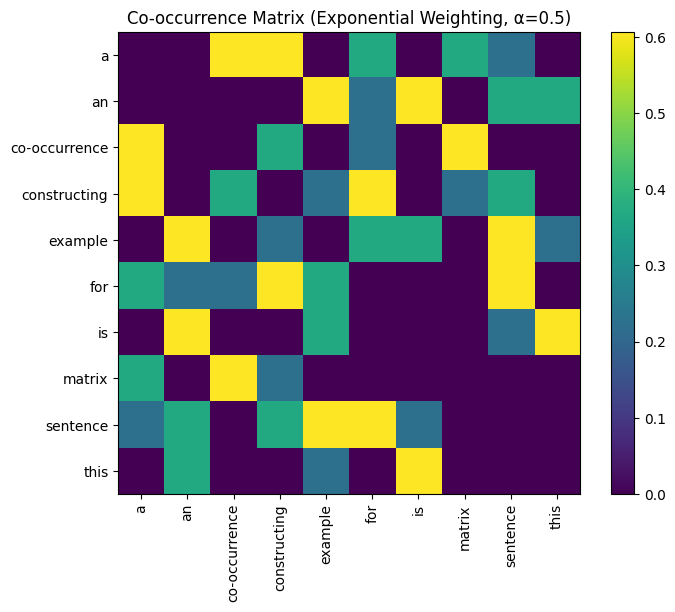

In [ ]:
import numpy as np
import math

def build_co_occurrence_matrix_with_weight(words, window_size, weighting='none', alpha=0.5):
    """
    构建共现矩阵，并根据给定的加权策略调整词对之间的权重。

    参数：
      words: list，文本中的所有单词（应预先处理为小写、分词）
      window_size: int，窗口大小，即中心词左右范围
      weighting: str，加权策略。可选值：
                 'none'：默认不加权，每次共现加1；
                 'linear'：使用线性衰减；
                 'exponential'：使用指数衰减。
      alpha: float，对于指数衰减的方法，控制衰减速度的参数

    返回：
      matrix: np.array，共现矩阵
      vocab: list，词汇表（唯一单词）
    """
    # 创建词汇表与索引映射
    vocab = sorted(set(words))
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    size = len(vocab)
    matrix = np.zeros((size, size))

    # 遍历每个单词，构造共现计数
    for i, center_word in enumerate(words):
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(words))
        for j in range(start, end):
            if i == j:
                continue  # 排除自身共现

            # 计算距离：绝对距离
            distance = abs(i - j)

            # 根据加权策略计算权重
            if weighting == 'none':
                weight = 1
            elif weighting == 'linear':
                # 若距离为1，权重=1；距离越大，权重降低，直到窗口范围外变为0
                # 此处权重归一化至 [0,1] 之间
                weight = (window_size - distance + 1) / window_size
            elif weighting == 'exponential':
                weight = math.exp(-alpha * distance)
            else:
                raise ValueError("不支持的 weighting 参数，请选择 'none', 'linear', 或 'exponential'")

            matrix[word2idx[center_word], word2idx[words[j]]] += weight
    return matrix, vocab
# 示例文本及预处理（需要按照实际数据替换）
text = "this is an example sentence for constructing a co-occurrence matrix"
words = text.lower().split()

# 指定一个窗口大小（例如 3）
window_size = 3

# 构建三种加权方式下的共现矩阵：
matrix_none, vocab = build_co_occurrence_matrix_with_weight(words, window_size, weighting='none')
matrix_linear, _ = build_co_occurrence_matrix_with_weight(words, window_size, weighting='linear')
matrix_exp, _ = build_co_occurrence_matrix_with_weight(words, window_size, weighting='exponential', alpha=0.5)
import matplotlib.pyplot as plt

def plot_matrix(matrix, vocab, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, interpolation='nearest', cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(len(vocab)), vocab, rotation=90)
    plt.yticks(range(len(vocab)), vocab)
    plt.show()

plot_matrix(matrix_none, vocab, "Co-occurrence Matrix (No Weighting)")
plot_matrix(matrix_linear, vocab, "Co-occurrence Matrix (Linear Weighting)")
plot_matrix(matrix_exp, vocab, "Co-occurrence Matrix (Exponential Weighting, α=0.5)")
